In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#load dataset
data = fetch_california_housing()
# split data to train & test
x_train_all, x_test, y_train_all, y_test = train_test_split(data.data, data.target)
#split training data to train & validation
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all)


In [3]:
# print shape of each set
print("X_train_all shape :",x_train_all.shape)
print("X_val shape :", x_val.shape)
print("X_test shape :", x_test.shape)


X_train_all shape : (15480, 8)
X_val shape : (3870, 8)
X_test shape : (5160, 8)


In [4]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

In [5]:
# define the model architecture
model = keras.models.Sequential()
model.add(layers.Dense(60, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(35, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

In [6]:
# compile the model
model.compile(loss='mean_squared_error',
              optimizer='SGD',
               metrics = ['mean_squared_error']
              )

In [7]:
# Train the model
history = model.fit(
    x_train, y_train, epochs=100,
    validation_data = (x_val, y_val),
    verbose=1
)


Epoch 1/100
363/363 [==============================] - 2s 5ms/step - loss: 1.2080 - mean_squared_error: 1.2080 - val_loss: 0.6726 - val_mean_squared_error: 0.6726
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.8206 - mean_squared_error: 0.8206 - val_loss: 0.7918 - val_mean_squared_error: 0.7918
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0748 - mean_squared_error: 1.0748 - val_loss: 0.7101 - val_mean_squared_error: 0.7101
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1535 - mean_squared_error: 1.1535 - val_loss: 0.6216 - val_mean_squared_error: 0.6216
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7052 - mean_squared_error: 0.7052 - val_loss: 0.5759 - val_mean_squared_error: 0.5759
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6712 - mean_squared_error: 0.6712 - val_loss: 0.5322 - val_mean_squared_error: 0.5322
Epoch 7/100
363/363 [=

In [8]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                540       
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 35)                2135      
                                                                 
 dropout_1 (Dropout)         (None, 35)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 36        
                                                                 
Total params: 2,711
Trainable params: 2,711
Non-trainable params: 0
_________________________________________________________________


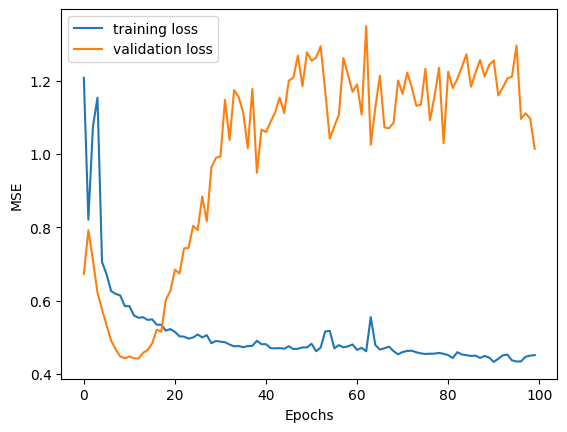

In [9]:
#inspect the fit history to see how the model perform in each epoch.
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [10]:
# evaluate the model on test data
model.evaluate(x_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.4346 - mean_squared_error: 0.4346


[0.434575617313385, 0.434575617313385]

In [11]:
# Add early stopping to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [13]:
# recompile the model
model.compile(loss='mean_squared_error',
              optimizer='SGD',
               metrics = ['mean_squared_error']
              )

In [14]:
# Train the model with early stopping
history = model.fit(
    x_train, y_train,
    epochs=100,
    validation_data=(x_val, y_val),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4558 - mean_squared_error: 0.4558 - val_loss: 1.0262 - val_mean_squared_error: 1.0262
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4468 - mean_squared_error: 0.4468 - val_loss: 1.0691 - val_mean_squared_error: 1.0691
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4462 - mean_squared_error: 0.4462 - val_loss: 1.0002 - val_mean_squared_error: 1.0002
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4457 - mean_squared_error: 0.4457 - val_loss: 1.0738 - val_mean_squared_error: 1.0738
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4459 - mean_squared_error: 0.4459 - val_loss: 1.0796 - val_mean_squared_error: 1.0796
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4328 - mean_squared_error: 0.4328 - val_loss: 1.1490 - val_mean_squared_error: 1.1490
Epoch 7/100
363/363 [=

* after using `earlystop` model stoppen at epoch `13`

In [16]:
# evaluate the model on test data
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4253 - mean_squared_error: 0.4253


[0.42533910274505615, 0.42533910274505615]